# Tackle analysis

In this notebook, we analyse games from Super Rugby Pacific to identify trends and prepare for the opposition.

## Data loading

In [2]:
import pandas as pd
import numpy as np

# We load the CSV file
df = pd.read_csv("./data/tackles_SuperRugbyPacific_2024-25.csv") 
df

,Game ID,Competition,Season,Date,Home team,Away team,Tackling team,Carrying team,Time,Phase,...,Tackle outcome,Tackle qualifier,Tackle dominance,Tackler number,Tackle area,Tackler name,Tackler position,Attacking player name,Missed tackle category,Missed tackle outcome
0,945290,Super Rugby Pacific,2025,22/03/2025,Highlanders,Queensland Reds,Queensland Reds,Highlanders,1_00010,1,...,Passive,NaN,Ineffective Tackle,1st Tackler,Upper Torso,Angus Blyth,5,Tanielu Tele'a,NaN,NaN
1,945290,Super Rugby Pacific,2025,22/03/2025,Highlanders,Queensland Reds,Highlanders,Queensland Reds,1_00027,1,...,Passive,NaN,Ineffective Tackle,1st Tackler,Upper Torso,Soane Vikena,2,Heremaia Murray,NaN,NaN
2,945290,Super Rugby Pacific,2025,22/03/2025,Highlanders,Queensland Reds,Highlanders,Queensland Reds,1_00028,1,...,Complete,Assist,Neutral Tackle,2nd Tackler,Upper Torso,Mitchell Dunshea,5,Heremaia Murray,NaN,NaN
3,945290,Super Rugby Pacific,2025,22/03/2025,Highlanders,Queensland Reds,Highlanders,Queensland Reds,1_00033,2,...,Complete,NaN,Neutral Tackle,1st Tackler,Lower Torso,TK Howden,4,Tom Lynagh,NaN,NaN
4,945290,Super Rugby Pacific,2025,22/03/2025,Highlanders,Queensland Reds,Highlanders,Queensland Reds,1_00128,1,...,Passive,NaN,Ineffective Tackle,1st Tackler,Lower Torso,Soane Vikena,2,Hunter Paisami,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11763,945284,Super Rugby Pacific,2025,14/03/2025,Highlanders,Hurricanes,Hurricanes,Highlanders,2_08121,15,...,Complete,Assist,Neutral Tackle,2nd Tackler,Upper Torso,Asafo Aumua,2,Timoci Tavatavanawai,NaN,NaN
11764,945284,Super Rugby Pacific,2025,14/03/2025,Highlanders,Hurricanes,Hurricanes,Highlanders,2_08128,16,...,Complete,NaN,Neutral Tackle,1st Tackler,Upper Torso,Brayden Iose,6,Soane Vikena,NaN,NaN
11765,945284,Super Rugby Pacific,2025,14/03/2025,Highlanders,Hurricanes,Hurricanes,Highlanders,2_08134,17,...,Passive,NaN,Ineffective Tackle,1st Tackler,Lower Torso,Du'Plessis Kirifi,7,Will Stodart,NaN,NaN
11766,945284,Super Rugby Pacific,2025,14/03/2025,Highlanders,Hurricanes,Hurricanes,Highlanders,2_08142,18,...,Complete,NaN,Neutral Tackle,1st Tackler,Legs,Pouri Rakete-Stones,1,Soane Vikena,NaN,NaN


## Overall stats

In [4]:
# Count occurrences of each 'Tackle outcome' overall
outcome_counts_overall = df['Tackle outcome'].value_counts()

# Calculate percentages
outcome_percentages_overall = (outcome_counts_overall / outcome_counts_overall.sum()) * 100

# Print results
print("Overall Tackle Outcome Distribution:")
for outcome in outcome_counts_overall.index:
    print(f"{outcome}\t{outcome_counts_overall[outcome]}\t{outcome_percentages_overall[outcome]:.1f}%")


Overall Tackle Outcome Distribution:
Complete	5464	46.4%
Passive	3197	27.2%
Missed	1390	11.8%
Offload Allowed	731	6.2%
Sack	478	4.1%
Ineffective	212	1.8%
Turnover Won	126	1.1%
Pen Conceded	94	0.8%
Try Saver	39	0.3%
Forced in Touch	37	0.3%


## Team summaries

### When the team is tackling

In [6]:
# Count occurrences of each outcome per team
outcome_counts = df.groupby(['Tackling team', 'Tackle outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Show results team by team
for team in outcome_counts.index:
    print(f"Team: {team}")
    team_data = pd.DataFrame({
        'Count': outcome_counts.loc[team].astype(int),  # Ensure count is integer
        'Percentage': outcome_percentages.loc[team]
    }).sort_values(by='Count', ascending=False)

    for outcome, row in team_data.iterrows():
        print(f"{outcome}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

    print("-" * 30)

Team: ACT Brumbies
Complete	540	51.4%
Passive	268	25.5%
Missed	125	11.9%
Offload Allowed	64	6.1%
Sack	23	2.2%
Turnover Won	12	1.1%
Pen Conceded	8	0.8%
Ineffective	7	0.7%
Try Saver	2	0.2%
Forced in Touch	1	0.1%
------------------------------
Team: Blues
Complete	675	52.1%
Passive	327	25.2%
Missed	139	10.7%
Offload Allowed	57	4.4%
Sack	55	4.2%
Ineffective	15	1.2%
Turnover Won	13	1.0%
Pen Conceded	10	0.8%
Forced in Touch	3	0.2%
Try Saver	2	0.2%
------------------------------
Team: Chiefs
Complete	583	48.3%
Passive	325	26.9%
Missed	125	10.4%
Offload Allowed	65	5.4%
Sack	63	5.2%
Ineffective	16	1.3%
Pen Conceded	10	0.8%
Turnover Won	10	0.8%
Forced in Touch	5	0.4%
Try Saver	5	0.4%
------------------------------
Team: Crusaders
Complete	486	47.0%
Passive	254	24.6%
Missed	126	12.2%
Offload Allowed	87	8.4%
Sack	36	3.5%
Ineffective	23	2.2%
Turnover Won	9	0.9%
Pen Conceded	8	0.8%
Forced in Touch	4	0.4%
Try Saver	1	0.1%
------------------------------
Team: Fijian Drua
Complete	362	38.6%
Passive	278

### When the team is carrying (i.e., being tackled)

In [8]:
# Count occurrences of each outcome per team
outcome_counts = df.groupby(['Carrying team', 'Tackle outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Show results team by team
for team in outcome_counts.index:
    print(f"Team: {team}")
    team_data = pd.DataFrame({
        'Count': outcome_counts.loc[team].astype(int),  # Ensure count is integer
        'Percentage': outcome_percentages.loc[team]
    }).sort_values(by='Count', ascending=False)

    for outcome, row in team_data.iterrows():
        print(f"{outcome}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

    print("-" * 30)

Team: ACT Brumbies
Complete	654	51.3%
Passive	328	25.7%
Missed	129	10.1%
Offload Allowed	68	5.3%
Sack	39	3.1%
Ineffective	22	1.7%
Turnover Won	14	1.1%
Try Saver	10	0.8%
Pen Conceded	8	0.6%
Forced in Touch	4	0.3%
------------------------------
Team: Blues
Complete	574	48.2%
Passive	337	28.3%
Missed	120	10.1%
Offload Allowed	69	5.8%
Sack	53	4.4%
Ineffective	19	1.6%
Turnover Won	10	0.8%
Pen Conceded	9	0.8%
Forced in Touch	1	0.1%
Try Saver	0	0.0%
------------------------------
Team: Chiefs
Complete	505	44.7%
Passive	285	25.2%
Missed	159	14.1%
Offload Allowed	74	6.5%
Sack	48	4.2%
Ineffective	27	2.4%
Pen Conceded	16	1.4%
Turnover Won	11	1.0%
Try Saver	5	0.4%
Forced in Touch	1	0.1%
------------------------------
Team: Crusaders
Complete	549	50.4%
Passive	226	20.7%
Missed	151	13.9%
Offload Allowed	77	7.1%
Sack	41	3.8%
Ineffective	22	2.0%
Turnover Won	12	1.1%
Try Saver	6	0.6%
Pen Conceded	4	0.4%
Forced in Touch	2	0.2%
------------------------------
Team: Fijian Drua
Complete	460	44.9%
Passive	3

## Team-specific defence analysis

### Players missing tackles

In [10]:
selected_team = 'Chiefs'

# Filter for the selected team
df_team = df[df['Tackling team'] == selected_team]

# Count occurrences of each outcome per player
outcome_counts = df_team.groupby(['Tackler name', 'Tackle outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Sort players by percentage of 'Missed' tackles (descending), defaulting to 0% if 'Missed' is not present
sorted_players = outcome_percentages.get('Missed', pd.Series(0, index=outcome_percentages.index)).sort_values(ascending=False).index

# Show results player by player
print(f"Team: {selected_team}")
for player in sorted_players:
    print(f"Player: {player}")
    player_data = pd.DataFrame({
        'Count': outcome_counts.loc[player].astype(int),  # Ensure count is integer
        'Percentage': outcome_percentages.loc[player]
    }).sort_values(by='Count', ascending=False)

    for outcome, row in player_data.iterrows():
        print(f"{outcome}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

    print("-" * 30)

Team: Chiefs
Player: Manasa Mataele
Missed	3	75.0%
Passive	1	25.0%
Complete	0	0.0%
Forced in Touch	0	0.0%
Ineffective	0	0.0%
Offload Allowed	0	0.0%
Pen Conceded	0	0.0%
Sack	0	0.0%
Try Saver	0	0.0%
Turnover Won	0	0.0%
------------------------------
Player: Etene Nanai-Seturo
Missed	2	33.3%
Complete	1	16.7%
Ineffective	1	16.7%
Offload Allowed	1	16.7%
Passive	1	16.7%
Forced in Touch	0	0.0%
Pen Conceded	0	0.0%
Sack	0	0.0%
Try Saver	0	0.0%
Turnover Won	0	0.0%
------------------------------
Player: Reuben O'Neill
Complete	9	39.1%
Missed	7	30.4%
Passive	7	30.4%
Forced in Touch	0	0.0%
Ineffective	0	0.0%
Offload Allowed	0	0.0%
Pen Conceded	0	0.0%
Sack	0	0.0%
Try Saver	0	0.0%
Turnover Won	0	0.0%
------------------------------
Player: Josh Jacomb
Passive	17	39.5%
Complete	13	30.2%
Missed	8	18.6%
Offload Allowed	3	7.0%
Pen Conceded	1	2.3%
Sack	1	2.3%
Forced in Touch	0	0.0%
Ineffective	0	0.0%
Try Saver	0	0.0%
Turnover Won	0	0.0%
------------------------------
Player: Kaylum Boshier
Complete	22	43.1

### Players with dominant tackles

In [12]:
# Filter for the selected team
df_team = df[df['Tackling team'] == selected_team]

# Count occurrences of each outcome per player
outcome_counts = df_team.groupby(['Tackler name', 'Tackle outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Sort players by percentage of 'Missed' tackles (descending), defaulting to 0% if 'Missed' is not present
sorted_players = outcome_percentages.get('Sack', pd.Series(0, index=outcome_percentages.index)).sort_values(ascending=False).index

# Show results player by player
print(f"Team: {selected_team}")
for player in sorted_players:
    print(f"Player: {player}")
    player_data = pd.DataFrame({
        'Count': outcome_counts.loc[player].astype(int),  # Ensure count is integer
        'Percentage': outcome_percentages.loc[player]
    }).sort_values(by='Count', ascending=False)

    for outcome, row in player_data.iterrows():
        print(f"{outcome}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

    print("-" * 30)

Team: Chiefs
Player: James Thompson
Complete	2	66.7%
Sack	1	33.3%
Forced in Touch	0	0.0%
Ineffective	0	0.0%
Missed	0	0.0%
Offload Allowed	0	0.0%
Passive	0	0.0%
Pen Conceded	0	0.0%
Try Saver	0	0.0%
Turnover Won	0	0.0%
------------------------------
Player: Simon Parker
Complete	37	62.7%
Sack	9	15.3%
Missed	5	8.5%
Passive	5	8.5%
Turnover Won	2	3.4%
Offload Allowed	1	1.7%
Forced in Touch	0	0.0%
Ineffective	0	0.0%
Pen Conceded	0	0.0%
Try Saver	0	0.0%
------------------------------
Player: Jimmy Tupou
Complete	5	71.4%
Passive	1	14.3%
Sack	1	14.3%
Forced in Touch	0	0.0%
Ineffective	0	0.0%
Missed	0	0.0%
Offload Allowed	0	0.0%
Pen Conceded	0	0.0%
Try Saver	0	0.0%
Turnover Won	0	0.0%
------------------------------
Player: Leroy Carter
Passive	19	33.9%
Complete	16	28.6%
Missed	7	12.5%
Offload Allowed	6	10.7%
Sack	6	10.7%
Ineffective	1	1.8%
Turnover Won	1	1.8%
Forced in Touch	0	0.0%
Pen Conceded	0	0.0%
Try Saver	0	0.0%
------------------------------
Player: Samipeni Finau
Complete	33	46.5%
Missed

### Type of missed tackles

In [14]:
# Filter for the selected team
df_team = df[df['Tackling team'] == selected_team]

# Filter for missed tackles
df_missed = df_team.dropna(subset=['Missed tackle category'], inplace=False)

In [15]:
# Count occurrences of each tackle outcome per player
outcome_counts = df_team.groupby(['Tackler name', 'Tackle outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Extract only missed tackles for analysis
df_missed = df_team[df_team['Tackle outcome'] == 'Missed']

# Count occurrences of each missed tackle category per player
missed_category_counts = df_missed.groupby(['Tackler name', 'Missed tackle category']).size().unstack(fill_value=0)

# Calculate percentages for missed tackle categories
missed_category_percentages = missed_category_counts.div(missed_category_counts.sum(axis=1), axis=0) * 100

# Sort players by percentage of missed tackles (descending), defaulting to 0% if no missed tackles
sorted_players = outcome_percentages.get('Missed', pd.Series(0, index=outcome_percentages.index)).sort_values(ascending=False).index

# Show results player by player in sorted order
print(f"Team: {selected_team}")
for player in sorted_players:
    total_missed = outcome_counts.get('Missed', pd.Series(0, index=outcome_counts.index)).loc[player]  # Total missed tackles
    missed_percentage = outcome_percentages.get('Missed', pd.Series(0, index=outcome_percentages.index)).loc[player]  # Percentage of missed tackles

    if total_missed > 0:
        print(f"Player: {player} - Missed tackles: {total_missed} ({missed_percentage:.1f}%)")
        player_missed_data = pd.DataFrame({
            'Count': missed_category_counts.loc[player].astype(int),
            'Percentage': missed_category_percentages.loc[player]
        }).sort_values(by='Count', ascending=False)

        for category, row in player_missed_data.iterrows():
            print(f"{category}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

        print("-" * 30)


Team: Chiefs
Player: Manasa Mataele - Missed tackles: 3 (75.0%)
Bumped Off	1	33.3%
Positional	1	33.3%
Stepped	1	33.3%
Outpaced	0	0.0%
------------------------------
Player: Etene Nanai-Seturo - Missed tackles: 2 (33.3%)
Bumped Off	2	100.0%
Outpaced	0	0.0%
Positional	0	0.0%
Stepped	0	0.0%
------------------------------
Player: Reuben O'Neill - Missed tackles: 7 (30.4%)
Bumped Off	4	57.1%
Positional	2	28.6%
Stepped	1	14.3%
Outpaced	0	0.0%
------------------------------
Player: Josh Jacomb - Missed tackles: 8 (18.6%)
Bumped Off	5	62.5%
Stepped	2	25.0%
Outpaced	1	12.5%
Positional	0	0.0%
------------------------------
Player: Kaylum Boshier - Missed tackles: 9 (17.6%)
Bumped Off	6	66.7%
Positional	2	22.2%
Outpaced	1	11.1%
Stepped	0	0.0%
------------------------------
Player: Samipeni Finau - Missed tackles: 12 (16.9%)
Bumped Off	7	58.3%
Stepped	3	25.0%
Positional	2	16.7%
Outpaced	0	0.0%
------------------------------
Player: Jahrome Brown - Missed tackles: 11 (15.7%)
Bumped Off	7	63.6%
Step

## Team-specific attack analysis

### Players evading tackles

In [17]:
# Filter for the selected team
df_team = df[df['Carrying team'] == selected_team]

# Filter for missed tackles
df_missed = df_team.dropna(subset=['Missed tackle category'], inplace=False)

In [18]:
# Count occurrences of each tackle outcome per player
outcome_counts = df_team.groupby(['Attacking player name', 'Tackle outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Extract only missed tackles for analysis
df_missed = df_team[df_team['Tackle outcome'] == 'Missed']

# Count occurrences of each missed tackle category per player
missed_category_counts = df_missed.groupby(['Attacking player name', 'Missed tackle category']).size().unstack(fill_value=0)

# Calculate percentages for missed tackle categories
missed_category_percentages = missed_category_counts.div(missed_category_counts.sum(axis=1), axis=0) * 100

# Sort players by percentage of missed tackles (descending), defaulting to 0% if no missed tackles
sorted_players = outcome_counts.get('Missed', pd.Series(0, index=outcome_counts.index)).sort_values(ascending=False).index

# Show results player by player in sorted order
print(f"Team: {selected_team}")
for player in sorted_players:
    total_missed = outcome_counts.get('Missed', pd.Series(0, index=outcome_counts.index)).loc[player]  # Total missed tackles
    missed_percentage = outcome_percentages.get('Missed', pd.Series(0, index=outcome_percentages.index)).loc[player]  # Percentage of missed tackles

    if total_missed > 0:
        print(f"Player: {player} - Evaded tackles: {total_missed} ({missed_percentage:.1f}%)")
        player_missed_data = pd.DataFrame({
            'Count': missed_category_counts.loc[player].astype(int),
            'Percentage': missed_category_percentages.loc[player]
        }).sort_values(by='Count', ascending=False)

        for category, row in player_missed_data.iterrows():
            print(f"{category}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

        print("-" * 30)


Team: Chiefs
Player: Damian McKenzie - Evaded tackles: 35 (43.2%)
Stepped	16	45.7%
Bumped Off	12	34.3%
Outpaced	4	11.4%
Positional	3	8.6%
------------------------------
Player: Leroy Carter - Evaded tackles: 21 (30.9%)
Bumped Off	12	57.1%
Stepped	8	38.1%
Positional	1	4.8%
Outpaced	0	0.0%
------------------------------
Player: Quinn Tupaea - Evaded tackles: 15 (14.6%)
Bumped Off	9	60.0%
Positional	4	26.7%
Outpaced	1	6.7%
Stepped	1	6.7%
------------------------------
Player: Anton Lienert-Brown - Evaded tackles: 13 (17.6%)
Bumped Off	10	76.9%
Positional	3	23.1%
Outpaced	0	0.0%
Stepped	0	0.0%
------------------------------
Player: Emoni Narawa - Evaded tackles: 12 (19.7%)
Stepped	8	66.7%
Positional	2	16.7%
Bumped Off	1	8.3%
Outpaced	1	8.3%
------------------------------
Player: Samipeni Finau - Evaded tackles: 7 (13.0%)
Bumped Off	6	85.7%
Stepped	1	14.3%
Outpaced	0	0.0%
Positional	0	0.0%
------------------------------
Player: Josh Jacomb - Evaded tackles: 6 (23.1%)
Stepped	3	50.0%
Positio

### Players offloading the ball

In [20]:
# Count occurrences of "Offload Allowed" per player
offload_counts = df_team[df_team['Tackle outcome'] == 'Offload Allowed'].groupby('Attacking player name').size()

# Calculate total tackles per player to compute percentages
total_tackles_per_player = df_team.groupby('Attacking player name').size()

# Compute percentage of "Offload Allowed" tackles for each player
offload_percentage = (offload_counts / total_tackles_per_player * 100).fillna(0)

# Create a sorted list of players based on "Offload Allowed" count (descending)
sorted_offload_players = offload_counts.sort_values(ascending=False).index

# Print the results
print(f"Players sorted by 'Offload Allowed' (Team: {selected_team})")
for player in sorted_offload_players:
    print(f"{player}\t{offload_counts[player]}\t{offload_percentage[player]:.1f}%")


Players sorted by 'Offload Allowed' (Team: Chiefs)
Emoni Narawa	7	11.5%
Leroy Carter	7	10.3%
Anton Lienert-Brown	6	8.1%
Jahrome Brown	6	13.3%
Damian McKenzie	6	7.4%
Simon Parker	5	10.0%
Luke Jacobson	5	8.2%
Josh Jacomb	4	15.4%
Manasa Mataele	4	80.0%
Naitoa Ah Kuoi	3	5.7%
Quinn Tupaea	3	2.9%
Xavier Roe	3	27.3%
Gideon Wrampling	2	13.3%
George Dyer	2	9.1%
Samipeni Finau	2	3.7%
Shaun Stevenson	2	11.1%
Tupou Vaa'i	2	2.6%
Jimmy Tupou	1	5.6%
Cortez Ratima	1	6.2%
Reuben O'Neill	1	10.0%
Samisoni Taukei'aho	1	2.1%
Daniel Rona	1	3.4%


## Visualisation

In [22]:
viz_team = selected_team
viz_season = 2025

df_viz = df[(df['Season'] == viz_season) & (df['Tackling team'] == viz_team)]
df_viz

,Game ID,Competition,Season,Date,Home team,Away team,Tackling team,Carrying team,Time,Phase,...,Tackle outcome,Tackle qualifier,Tackle dominance,Tackler number,Tackle area,Tackler name,Tackler position,Attacking player name,Missed tackle category,Missed tackle outcome
1541,945289,Super Rugby Pacific,2025,21/03/2025,Moana Pasifika,Chiefs,Chiefs,Moana Pasifika,1_00602,1,...,Missed,NaN,Ineffective Tackle,1st Tackler,Legs,Damian McKenzie,10,Lalomilo Lalomilo,Stepped,Tackled
1542,945289,Super Rugby Pacific,2025,21/03/2025,Moana Pasifika,Chiefs,Chiefs,Moana Pasifika,1_00604,1,...,Passive,Assist,Ineffective Tackle,2nd Tackler,Legs,Kaylum Boshier,7,Lalomilo Lalomilo,NaN,NaN
1543,945289,Super Rugby Pacific,2025,21/03/2025,Moana Pasifika,Chiefs,Chiefs,Moana Pasifika,1_00605,1,...,Complete,Assist,Neutral Tackle,3rd Tackler,Upper Torso,Gideon Wrampling,12,Lalomilo Lalomilo,NaN,NaN
1544,945289,Super Rugby Pacific,2025,21/03/2025,Moana Pasifika,Chiefs,Chiefs,Moana Pasifika,1_00613,2,...,Passive,NaN,Ineffective Tackle,1st Tackler,Legs,Xavier Roe,9,William Havili,NaN,NaN
1555,945289,Super Rugby Pacific,2025,21/03/2025,Moana Pasifika,Chiefs,Chiefs,Moana Pasifika,1_00940,1,...,Offload Allowed,NaN,Neutral Tackle,1st Tackler,Upper Torso,Bradley Slater,2,Pepesana Patafilo,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11276,945287,Super Rugby Pacific,2025,15/03/2025,Chiefs,Blues,Chiefs,Blues,2_07640,1,...,Complete,NaN,Neutral Tackle,1st Tackler,Legs,Samisoni Taukei'aho,2,Marcel Renata,NaN,NaN
11277,945287,Super Rugby Pacific,2025,15/03/2025,Chiefs,Blues,Chiefs,Blues,2_07641,1,...,Complete,Assist,Neutral Tackle,2nd Tackler,Upper Torso,Quinn Tupaea,12,Marcel Renata,NaN,NaN
11278,945287,Super Rugby Pacific,2025,15/03/2025,Chiefs,Blues,Chiefs,Blues,2_07641,1,...,Complete,Assist,Neutral Tackle,3rd Tackler,Lower Torso,Gideon Wrampling,13,Marcel Renata,NaN,NaN
11279,945287,Super Rugby Pacific,2025,15/03/2025,Chiefs,Blues,Chiefs,Blues,2_07710,1,...,Passive,NaN,Ineffective Tackle,1st Tackler,Lower Torso,Jahrome Brown,7,Finlay Christie,NaN,NaN


In [23]:
class field():
    def __init__(self):
        #import the libraries and then create self variables so that all necessary imports are initialized only once
        from matplotlib.patches import Rectangle as rect
        self.plt = plt
        self.rect = rect
        
    
    def union_pitch(self, pitch_color = 'white', line_color = 'Black', poles = False, linestyle = '-', line_alpha=1):
        
        #draw the rectangle that makes up the pitch and lies behind the field lines
        ax.add_patch(self.rect((0, 0), 100, 68, fc = pitch_color, zorder=0))

        #top & bottom lines
        plt.hlines(0, 0, 100, line_color), plt.hlines(68, 0, 100, line_color)

        #ends, half, 22s
        for x in range(5):
            c = [0, 22, 50, 78, 100]
            plt.vlines(c[x], 0, 68, line_color)

        #vertical and horizontal coordinates
        vertical_lines = [(2, 8), (12, 18), (66, 60), (56, 50), (22, 29), (39, 46)]
        horizontal_lines = [(47, 53), (37, 43), (57, 63), (19, 25), (75, 81), (5, 11), (95, 89)]
        vertical_y, horizontal_y = [5, 40, 60, 95], [5, 15, 53, 63]

        #lines
        for x in range(6):
            for y in range(4):
                plt.vlines(vertical_y[y], vertical_lines[x][0], vertical_lines[x][1], line_color, linestyle, line_alpha, zorder=0)
        for x in range(7):
            for y in range(4):
                plt.hlines(horizontal_y[y], horizontal_lines[x][0], horizontal_lines[x][1], line_color, linestyle, line_alpha, zorder=0)
        
        #if poles is true draw two thick rectangles at either end of the field
        if poles is True:
                plt.vlines(0, 29, 39, line_color, '-', alpha=1, linewidth=5, zorder=0)
                plt.vlines(100, 29, 39, line_color, '-', alpha=1, linewidth=5, zorder=0)

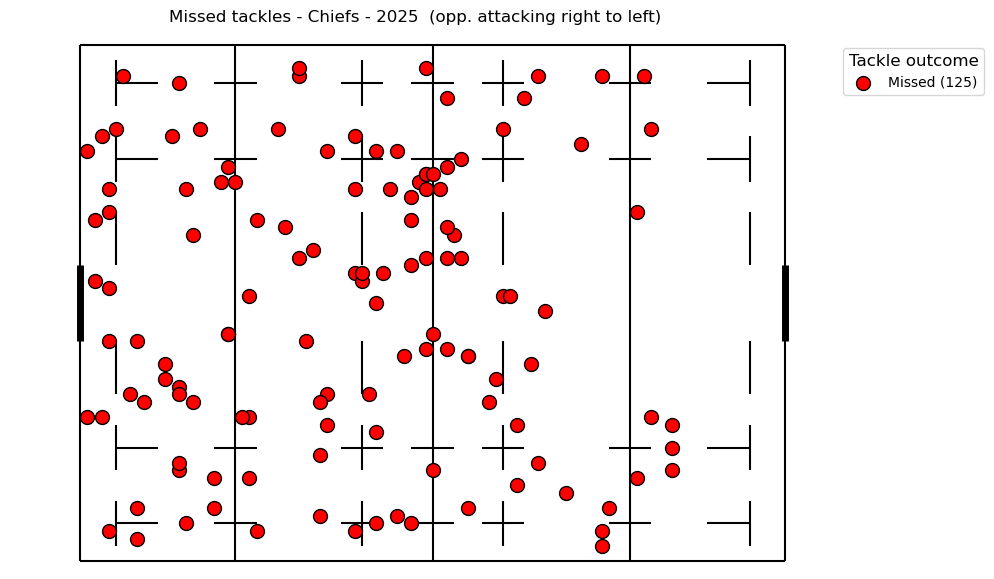

In [24]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

plot=plt.figure(figsize=(12, 7))
ax=plot.add_subplot()

# Generate the pitch background
x = field()
x.union_pitch(poles=True, pitch_color='white', line_color='black')  

# Define colors and markers for different kick types
styles = {
    'Missed':      {'color': 'red',  'marker': 'o'},
    # 'Kick Line Break': {'color': 'blue',  'marker': 's'}
}

type_counts = df_viz['Tackle outcome'].value_counts()

# Plot kicks and store scatter handles for legend
scatter_handles = {}
for _, row in df_viz.iterrows():
    if row['Tackle outcome'] != 'Missed':
        continue
    style = styles.get(row['Tackle outcome'], {'color': 'white', 'marker': 'o'})  # Default style
    scatter = ax.scatter(row['x_start'], row['y_start'], color=style['color'], marker=style['marker'], s=100, edgecolors='black', zorder=2)
    if row['Tackle outcome'] not in scatter_handles:
        scatter_handles[row['Tackle outcome']] = scatter

# Create legend in the order of break_styles
legend_handles = [scatter_handles[key] for key in styles.keys() if key in scatter_handles]
legend_labels = [f'{key} ({type_counts[key]})' for key in styles.keys() if key in scatter_handles]
plt.legend(legend_handles, legend_labels, bbox_to_anchor=(1.02, 0.98), loc='upper left', title='Tackle outcome', fontsize=10, title_fontsize=12)

# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Set limits
ax.set_xlim(-10, 105)
ax.set_ylim(-1, 70)

# Figure title
ax.set_title(f"Missed tackles - {viz_team} - {viz_season}  (opp. attacking right to left)")

# Adjust subplot to give more space on the right side for the legend
plt.subplots_adjust(right=0.8)  # Adjust the right margin to fit the legend

# Show and save plot
plt.savefig(f"./figures/{viz_team} - Defence - {viz_season} - Missed Tackle Map.png", bbox_inches='tight')
plt.show()

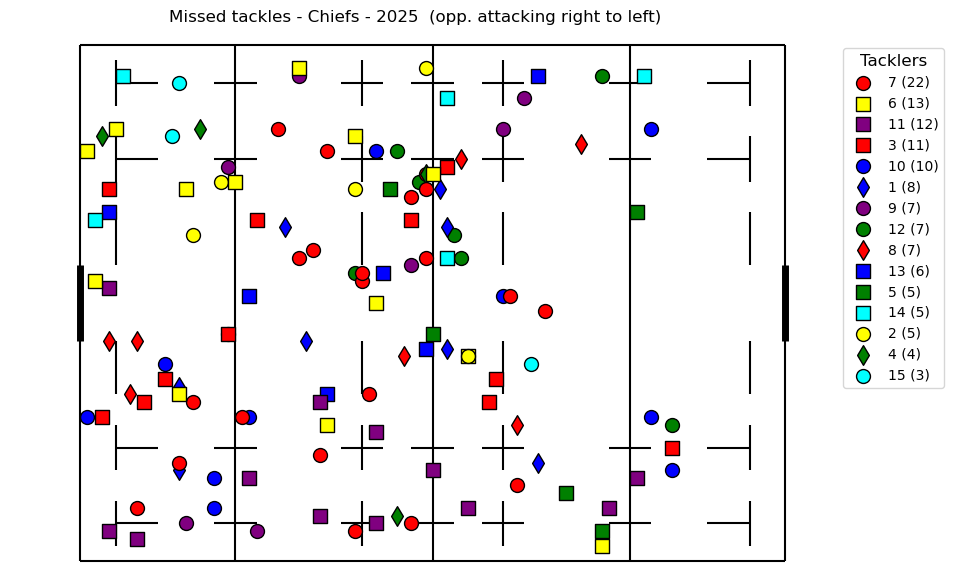

In [25]:
import itertools

plot=plt.figure(figsize=(12, 7))
ax=plot.add_subplot()

# Generate the pitch background
x = field()
x.union_pitch(poles=True, pitch_color='white', line_color='black')  

# Define a list of colors and markers for combinations
colors = ['blue', 'red', 'green', 'purple', 'yellow', 'cyan']
markers = ['o', 's', 'd', '^', 'v', '<', '>']

# Generate all combinations of colors and markers
color_marker_combinations = list(itertools.product(markers, colors))

# Generate a unique color-marker combination for each 'Kicking player'
players = df_viz['Tackler position'].unique()
styles = {
    player: {'color': color_marker_combinations[i % len(color_marker_combinations)][1], 
             'marker': color_marker_combinations[i % len(color_marker_combinations)][0]}
    for i, player in enumerate(players)
}

# Count the frequency of each tackler
player_counts = df_viz[df_viz['Tackle outcome']=='Missed']['Tackler position'].value_counts()

# Sort players by frequency (descending)
sorted_players = player_counts.index

# Plot kicks and store scatter handles for legend
scatter_handles = {}
for _, row in df_viz.iterrows():
    if row['Tackle outcome']!='Missed':
        continue
    style = styles.get(row['Tackler position'], {'color': 'white', 'marker': 'o'})  # Default style
    scatter = ax.scatter(row['x_start'], row['y_start'], color=style['color'], marker=style['marker'], s=100, edgecolors='black', zorder=2)
    if row['Tackler position'] not in scatter_handles:
        scatter_handles[row['Tackler position']] = scatter

# Create legend in the order of break_styles
legend_handles = [scatter_handles[player] for player in sorted_players if player in scatter_handles]
legend_labels = [f'{player} ({player_counts[player]})' for player in sorted_players if player in scatter_handles]

# Plot the legend
plt.legend(legend_handles, legend_labels, bbox_to_anchor=(1.02, 0.98), loc='upper left', title='Tacklers', fontsize=10, title_fontsize=12)


# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Set limits
ax.set_xlim(-10, 105)
ax.set_ylim(-1, 70)

# Figure title
ax.set_title(f"Missed tackles - {viz_team} - {viz_season}  (opp. attacking right to left)")

# Adjust subplot to give more space on the right side for the legend
plt.subplots_adjust(right=0.8)  # Adjust the right margin to fit the legend

# Show and save plot
plt.savefig(f"./figures/{viz_team} - Defence - {viz_season} - Missed Tackle Map (by positions).png", bbox_inches='tight')
plt.show()

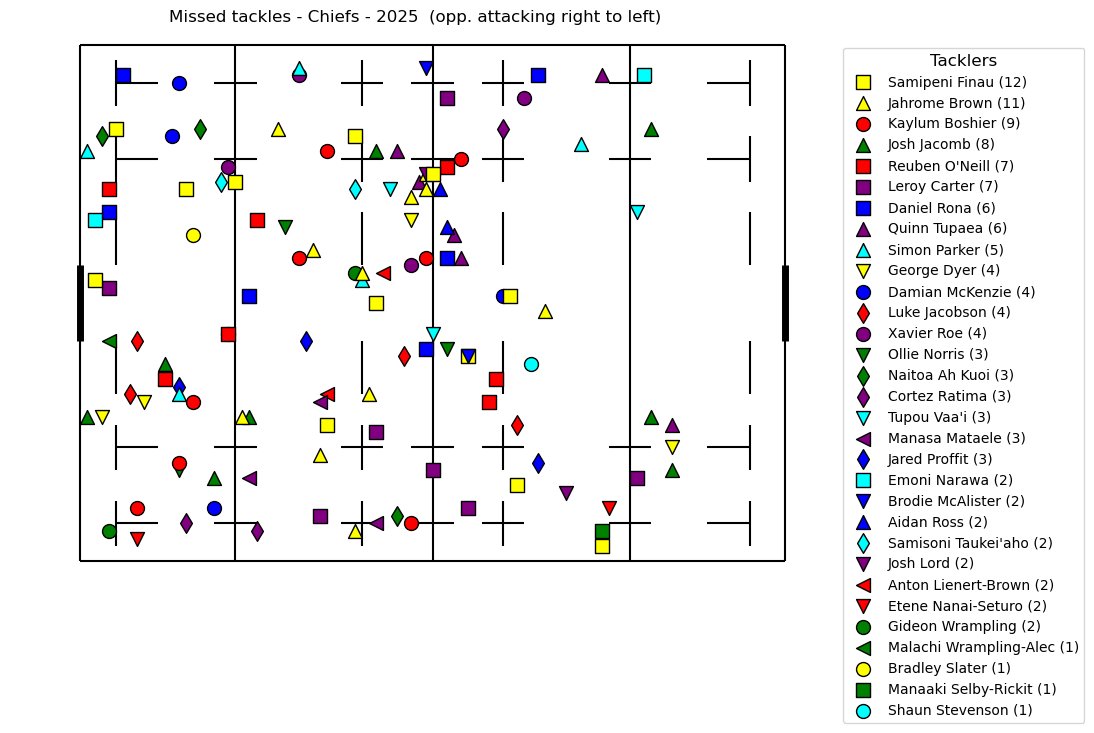

In [26]:
import itertools

plot=plt.figure(figsize=(12, 7))
ax=plot.add_subplot()

# Generate the pitch background
x = field()
x.union_pitch(poles=True, pitch_color='white', line_color='black')  

# Define a list of colors and markers for combinations
colors = ['blue', 'red', 'green', 'purple', 'yellow', 'cyan']
markers = ['o', 's', 'd', '^', 'v', '<', '>']

# Generate all combinations of colors and markers
color_marker_combinations = list(itertools.product(markers, colors))

# Generate a unique color-marker combination for each 'Kicking player'
players = df_viz['Tackler name'].unique()
styles = {
    player: {'color': color_marker_combinations[i % len(color_marker_combinations)][1], 
             'marker': color_marker_combinations[i % len(color_marker_combinations)][0]}
    for i, player in enumerate(players)
}

# Count the frequency of each tackler
player_counts = df_viz[df_viz['Tackle outcome']=='Missed']['Tackler name'].value_counts()

# Sort players by frequency (descending)
sorted_players = player_counts.index

# Plot kicks and store scatter handles for legend
scatter_handles = {}
for _, row in df_viz.iterrows():
    if row['Tackle outcome']!='Missed':
        continue
    style = styles.get(row['Tackler name'], {'color': 'white', 'marker': 'o'})  # Default style
    scatter = ax.scatter(row['x_start'], row['y_start'], color=style['color'], marker=style['marker'], s=100, edgecolors='black', zorder=2)
    if row['Tackler name'] not in scatter_handles:
        scatter_handles[row['Tackler name']] = scatter

# Create legend in the order of break_styles
legend_handles = [scatter_handles[player] for player in sorted_players if player in scatter_handles]
legend_labels = [f'{player} ({player_counts[player]})' for player in sorted_players if player in scatter_handles]

# Plot the legend
plt.legend(legend_handles, legend_labels, bbox_to_anchor=(1.02, 0.98), loc='upper left', title='Tacklers', fontsize=10, title_fontsize=12)


# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Set limits
ax.set_xlim(-10, 105)
ax.set_ylim(-1, 70)

# Figure title
ax.set_title(f"Missed tackles - {viz_team} - {viz_season}  (opp. attacking right to left)")

# Adjust subplot to give more space on the right side for the legend
plt.subplots_adjust(right=0.8)  # Adjust the right margin to fit the legend

# Show and save plot
plt.savefig(f"./figures/{viz_team} - Defence - {viz_season} - Missed Tackle Map (by players).png", bbox_inches='tight')
plt.show()

Done.